# TARUSHI KHANNA 
UNIVERSITY ROLL NUMBER - 1900270120060  
SCHOLAR NUMBER - 1911065 


In [32]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('C:\\Users\\HP\\MACHINE LEARNING codes\\MINI PROJECTS\\ML Projects ANTRIX\\TARUSHI')

In [3]:
data = pd.read_csv('car.data')
data.shape

(1727, 7)

In [4]:
headerList = ['Buying','Maint','Doors','Persons','Lug_boot','Safety','Acceptance']


###### to add header name to unamed columns  

In [6]:
data.to_csv("car.data", header=headerList, index= False)
data2 = pd.read_csv("car.data")

In [10]:
data

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Acceptance
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


## ELECTRONIC DESIGN EVALUATION

In [11]:
data.head()



,Buying,Maint,Doors,Persons,Lug_boot,Safety,Acceptance
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [12]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1727 non-null   object
 1   Maint       1727 non-null   object
 2   Doors       1727 non-null   object
 3   Persons     1727 non-null   object
 4   Lug_boot    1727 non-null   object
 5   Safety      1727 non-null   object
 6   Acceptance  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['med' 'high' 'low'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [14]:
for i in data.columns:
    print(data[i].value_counts())

med      432
high     432
low      432
vhigh    431
Name: Buying, dtype: int64
med      432
high     432
low      432
vhigh    431
Name: Maint, dtype: int64
5more    432
4        432
3        432
2        431
Name: Doors, dtype: int64
4       576
more    576
2       575
Name: Persons, dtype: int64
med      576
big      576
small    575
Name: Lug_boot, dtype: int64
med     576
high    576
low     575
Name: Safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: Acceptance, dtype: int64


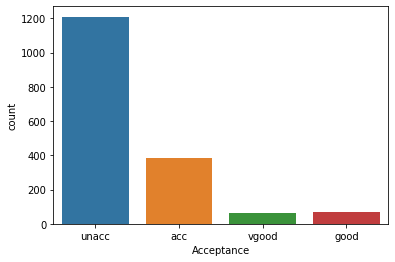

In [15]:
sns.countplot(data['Acceptance'])

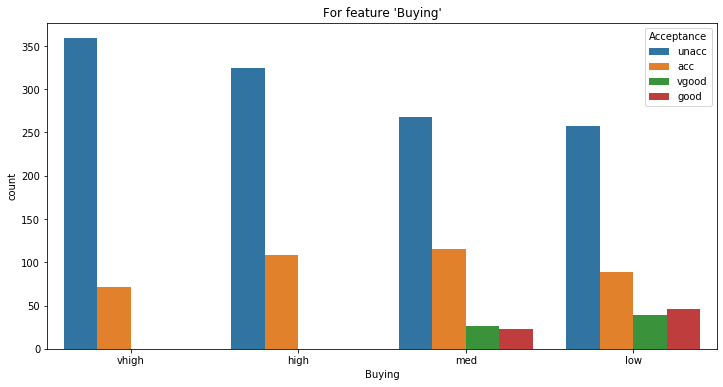

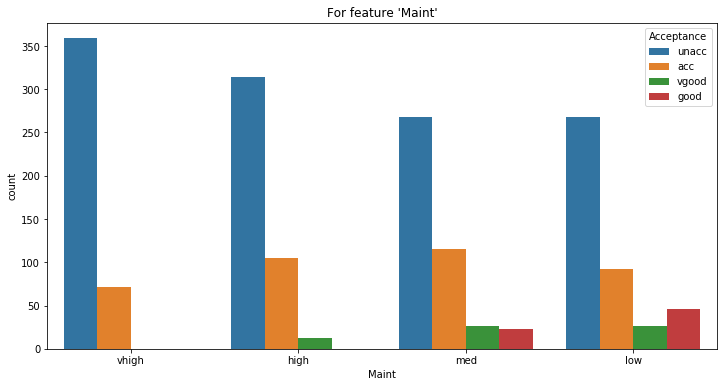

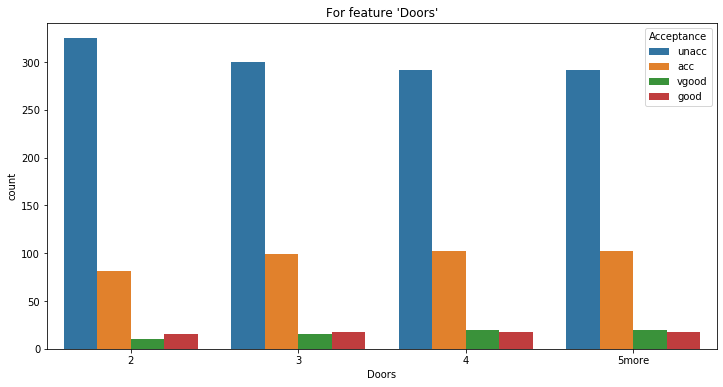

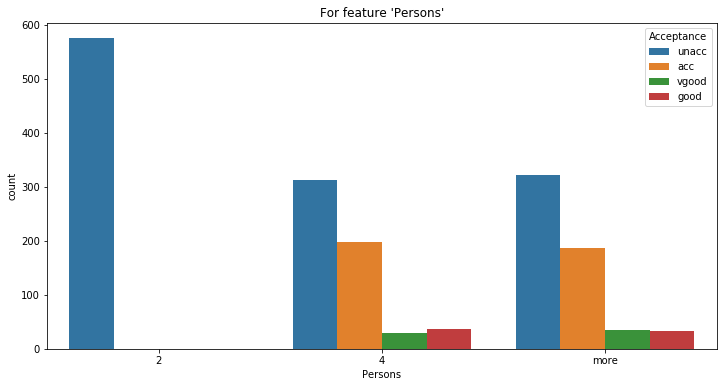

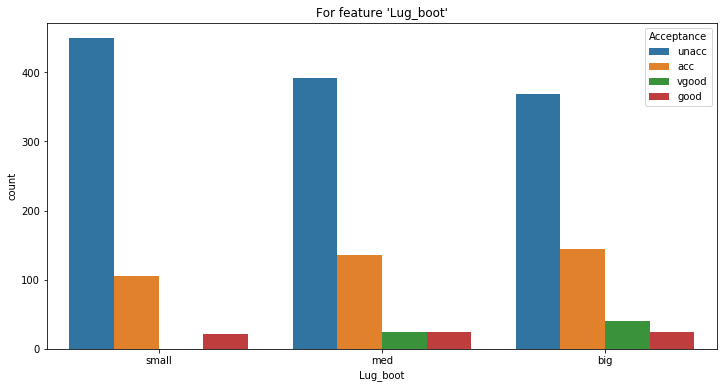

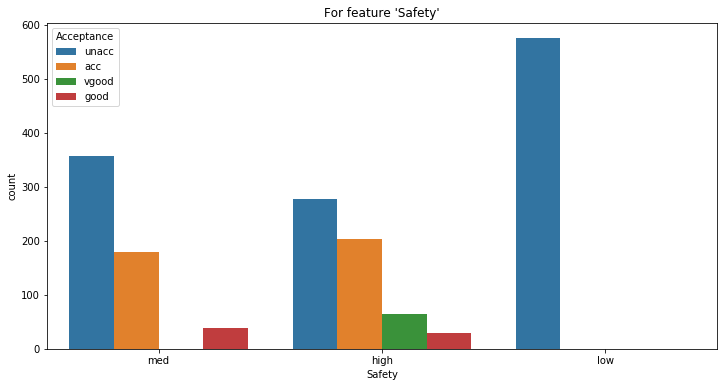

In [16]:
#  this is an unbalanced multiclass classification problem
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['Acceptance'])

# label encoding


In [17]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [18]:
data.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Acceptance
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [19]:
for i in data.columns:
    print(data[i].value_counts)
    

<bound method IndexOpsMixin.value_counts of 0       3
1       3
2       3
3       3
4       3
       ..
1722    1
1723    1
1724    1
1725    1
1726    1
Name: Buying, Length: 1727, dtype: int32>
<bound method IndexOpsMixin.value_counts of 0       3
1       3
2       3
3       3
4       3
       ..
1722    1
1723    1
1724    1
1725    1
1726    1
Name: Maint, Length: 1727, dtype: int32>
<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
1722    3
1723    3
1724    3
1725    3
1726    3
Name: Doors, Length: 1727, dtype: int32>
<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
1722    2
1723    2
1724    2
1725    2
1726    2
Name: Persons, Length: 1727, dtype: int32>
<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       1
3       1
4       1
       ..
1722    1
1723    1
1724    0
1725    0
1726    0
Name: Lug_boot, Length: 1727, dtype: int32>
<bound method Index

### HeatMap


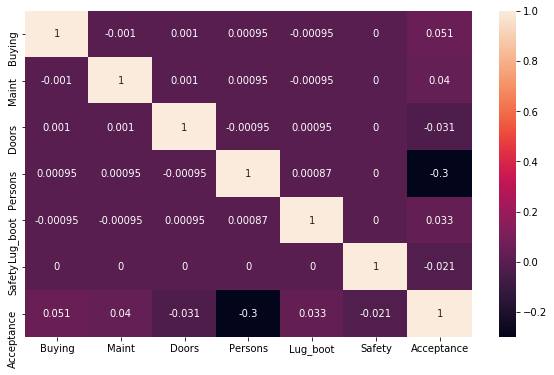

In [20]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [21]:
#  it can be seen that most of the columns shows very weak correlation with 'Acceptance'

In [22]:
X = data.iloc[:,:-1]
y=data.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MODEL SELECTION 

In [24]:
# MODEL SELECTION 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

##### LOGISTIC-REGESSION

In [25]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')
logreg.fit(X_train,y_train)
pred=logreg.predict(X_test)
logreg.score(X_test,y_test)

0.697495183044316

In [26]:
pred, y_test

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
        2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0,
        0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2,
        2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
        0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))

[[ 23   2  22  13]
 [  0   0   0   0]
 [ 92  15 338   9]
 [  3   0   1   1]]


#### KNN CLASSIFIER  

In [28]:
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.9036608863198459

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       118
           1       0.80      0.24      0.36        17
           2       0.92      1.00      0.96       361
           3       1.00      0.70      0.82        23

    accuracy                           0.90       519
   macro avg       0.89      0.67      0.73       519
weighted avg       0.90      0.90      0.89       519



### RANDOM FOREST CLASSIFIER 


In [30]:
# random forest classifier 
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))

0.9614643545279383


In [31]:
"'SCORE OF RANDOM FOREST IS BEST. HENCE THIS IS  THE SELECTED MODEL'"



"'SCORE OF RANDOM FOREST IS BEST. HENCE THIS IS  THE SELECTED MODEL'"